# ライブラリ

- PyTorchはニューラルネットワーク用のライブラリ
- torchvisionはデータを簡単に扱える（今回はMNIST）

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

# データセット

- MNISTとは：手書き数字（０～９）画像のデータセット（２８ｘ２８ピクセル）

In [2]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.96MB/s]


# ネットワーク定義
- ２層の全結合層
- 活性化関数はReLU
- 出力は１０クラスに対応

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [4]:
# 学習前後の予測を表示する関数
def show_preds(model, loader, title=""):
    model.eval()
    images, labels = next(iter(loader))
    with torch.no_grad():
        preds = model(images).argmax(dim=1)

    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"P:{preds[i].item()} / T:{labels[i].item()}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    print()
    print()
    print()

In [5]:
# 学習前後の予測を表示する関数
def show_preds(model, loader, title=""):
    model.eval()
    images, labels = next(iter(loader))
    with torch.no_grad():
        preds = model(images).argmax(dim=1)

    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"P:{preds[i].item()} / T:{labels[i].item()}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    print()
    print()
    print()

# 損失関数＆最適化アルゴリズム設定

In [6]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

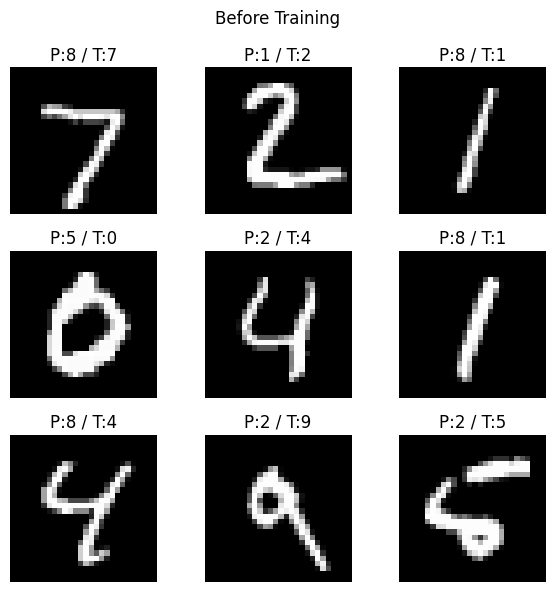

In [7]:
# 学習前を表示
show_preds(model, test_loader, "Before Training")

# 学習ループ（トレーニング）
- ここで「パラメータの最適化＝損失が小さくなるように重みを調整」する

In [8]:
for epoch in range(5):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 414.6815
Epoch 2, Loss: 212.5950
Epoch 3, Loss: 159.7658
Epoch 4, Loss: 129.0347
Epoch 5, Loss: 108.8652


# 精度の確認
- Test Accuracy：正しく分類できた割合

In [9]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 96.46%


# 可視化（誤分類例）

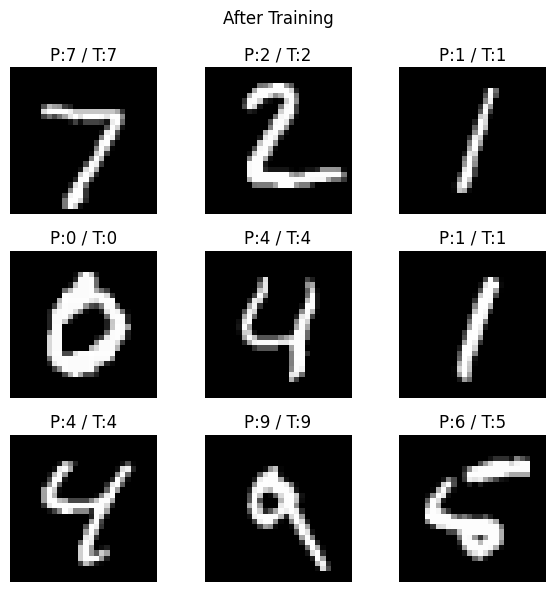

In [10]:
# トレーニング
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()

# 学習後を表示
show_preds(model, test_loader, "After Training")
